In [103]:
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')

In [104]:
ntrain = train.shape[0]
ntest = test.shape[0]
df = pd.concat((train, test))

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df['Sex'].isnull().sum()

0

In [107]:
gender = {'male':0, 'female':1} #숫자변환
df['Sex'] = df['Sex'].map(gender)

In [108]:
df.loc[(df['Embarked'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [109]:
df.sort_values(['Ticket'], ascending = True)[55:70] #정렬함수, 55번째에서 70번째 데이터 출력하는 것임

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",0,65.0,0,1,113509,61.9792,B30,C
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",0,NaN,0,0,113510,35.0000,C128,S
252,253,0.0,1,"Stead, Mr. William Thomas",0,62.0,0,0,113514,26.5500,C87,S
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0000,B28,NaN
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,NaN
802,803,1.0,1,"Carter, Master. William Thornton II",0,11.0,1,2,113760,120.0000,B96 B98,S
390,391,1.0,1,"Carter, Mr. William Ernest",0,36.0,1,2,113760,120.0000,B96 B98,S
435,436,1.0,1,"Carter, Miss. Lucile Polk",1,14.0,1,2,113760,120.0000,B96 B98,S
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",1,36.0,1,2,113760,120.0000,B96 B98,S
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",0,NaN,0,0,113767,50.0000,A32,S


In [110]:
df.loc[df['Embarked'].isnull(), 'Embarked']='S' #loc함수는 특정 행의 값을 바꿀 때 많이 사용됨

In [111]:
df_temp1 = df.copy()
df_temp1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [112]:
gender = {'S':0, 'C':1, 'Q':2}
df_temp1['Embarked'] = df_temp1['Embarked'].map(gender)

In [113]:
df_temp1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [114]:
#factorize 숫자값을 대입해주는 함수 사용

df_temp2 = df.copy()
df_temp2['Embarked'].factorize()

(array([0, 1, 0, ..., 0, 0, 1]), Index(['S', 'C', 'Q'], dtype='object'))

In [115]:
df_temp2['Embarked'].factorize()[0]

array([0, 1, 0, ..., 0, 0, 1])

In [116]:
df_temp2['Embarked'] = df_temp2['Embarked'].factorize()[0]
df_temp2['Embarked'].value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

In [117]:
#결측치 변경, 범주형 데이터를 숫자로 바꾸어주는 작업

In [118]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.') #mr, mrs 타이틀을 가져옴 

In [119]:
df['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Initial, dtype: int64

In [120]:
df.loc[(df['Initial'] == 'Mme') | (df['Initial'] == 'Mlle') | (df['Initial'] == 'Ms') | (df['Initial'] == 'Countess') | (df['Initial'] == 'Lady'), 'Initial'] = 'Lady'

In [121]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Lady':4, 'Don':5, 'Rev':6, 'Dr':7,
                 'Major':8, 'Sir':9, 'Col':10, 'Capt':11, 'Jonkheer':12}
df['Initial'] = df['Initial'].map(title_mapping)

In [122]:
drop_features = ['Name']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [123]:
df['Age'].isnull().sum()

263

In [124]:
df.groupby('Initial').agg({'Age':['mean','median','count']}) #agg 계산 함수

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      30.166667   26.0     6
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [125]:
#Fillna : 결측치에 특정 값을 넣는 함수

df['Age'].fillna(df.groupby('Initial')['Age'].transform('median'), inplace=True)

In [126]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [127]:
train = df[:ntrain] #리스트 문법임

In [128]:
import plotly.express as px
fig = px.violin(train, y='Age', color='Survived', violinmode='overlay') #범주 비교를 위한 것

fig.show()

In [129]:
df.loc[df['Age'] <= 2, 'Age'] = 0
df.loc[(df['Age'] > 2) & (df['Age'] <= 15), 'Age'] = 1 #조건, 변경문
df.loc[(df['Age'] > 15) & (df['Age'] <= 20), 'Age'] = 2
df.loc[(df['Age'] > 20) & (df['Age'] <= 33), 'Age'] = 3
df.loc[(df['Age'] > 33) & (df['Age'] <= 43), 'Age'] = 4
df.loc[(df['Age'] > 43) & (df['Age'] <= 60), 'Age'] = 5
df.loc[(df['Age'] > 60) & (df['Age'] <= 75), 'Age'] = 6
df.loc[ df['Age'] > 75, 'Age'] = 7

In [130]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,1,4.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,0,4.0,0,0,373450,8.0500,NaN,S,0.0


In [131]:
#피쳐 엔지니어링은 숫자화하는 것이 목적!

In [132]:
survived = train[train['Survived']==1]['Fare']
dead = train[train['Survived']==0]['Fare']
temp = pd.concat([survived,dead], axis=1, keys=['Survived', 'Dead'])

In [133]:
temp.iplot(kind='histogram', bins=(0, 600, 20))

In [134]:
df['Fare'].isnull().sum()

1

In [135]:
df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [136]:
df.loc[ df['Fare'] <= 20, 'Fare'] = 0
df.loc[(df['Fare'] > 20) & (df['Fare'] <= 40), 'Fare'] = 1
df.loc[(df['Fare'] > 40) & (df['Fare'] <= 60), 'Fare'] = 2
df.loc[(df['Fare'] > 60) & (df['Fare'] <= 80), 'Fare'] = 3
df.loc[(df['Fare'] > 80) & (df['Fare'] <= 100), 'Fare'] = 4
df.loc[ df['Fare'] > 100, 'Fare'] = 5

In [137]:
df['Family'] = df['SibSp'] + df['Parch'] + 1 #Family 라는 새로운 칼럼을 만들기로함

In [138]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,S,0.0,2
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,C,2.0,2
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,S,1.0,1
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,S,2.0,2
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,S,0.0,1


In [139]:
drop_features = ['SibSp', 'Parch']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,NaN,S,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,C85,C,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,NaN,S,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,C123,S,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,NaN,S,0.0,1


<Axes: >

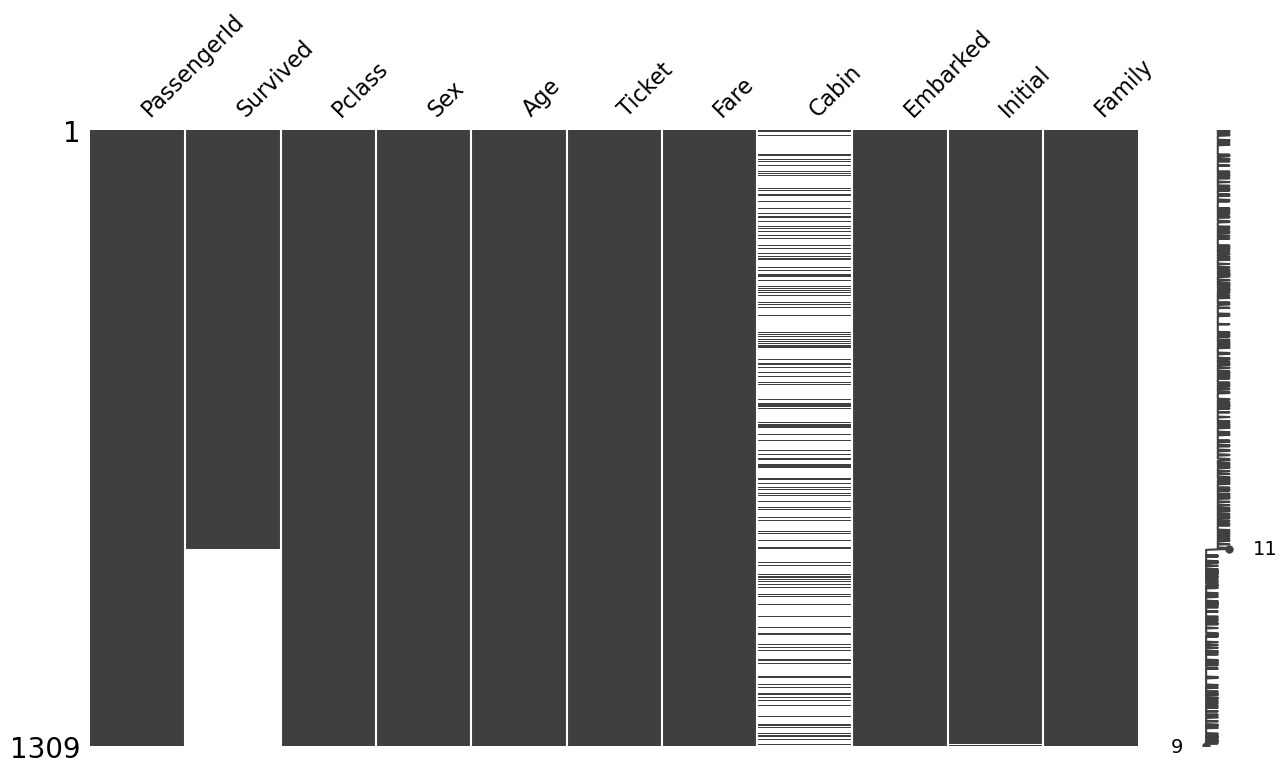

In [140]:
!pip install missingno

import missingno
missingno.matrix(df, figsize=(15,8)) #결측치 확인하기 위한 시각화 라이브러리

In [141]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [145]:
df['Cabin']=df['Cabin'].fillna('U')

In [146]:
df['Cabin'] = df['Cabin'].str[0]

In [147]:
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [148]:
df[df['Cabin']=='U']['Ticket']

0               A/5 21171
2        STON/O2. 3101282
4                  373450
5                  330877
7                  349909
              ...        
412                347086
413             A.5. 3236
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1014, dtype: object

In [149]:
train = df[:ntrain]

In [153]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train['Survived']==1]['Cabin']
dead = train[train['Survived']==0]['Cabin']
df_temp1 = pd.concat([survived,dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

In [155]:
df['Cabin'] = df['Cabin'].factorize()[0] #0부터 정렬 시켜주는 것 - 데이터 변경
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1


In [156]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [158]:
#regularexpression - [^\t\n\r\f\v] 문자가 아닌 것을 찾음

In [217]:
df['Ticket_initial'] = df['Ticket'].str.extract('([^\t\n\r\f\v]+) ') #추출

In [218]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450


In [219]:
df['Ticket_number'] = df['Ticket'].str.extract('( [^ \t\n\r\f\v]+)') 

In [220]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,NaN


In [221]:
df['Ticket_number'] = df['Ticket_number'].fillna(df['Ticket'])

In [225]:
df.loc[(df['Ticket_number'] == 'LINE'), 'Ticket_initial'] = 'Line'
df.loc[(df['Ticket_number'] == 'LINE'), 'Ticket_number'] = 0

In [226]:
df[df['Ticket_initial'] == 'Line']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number
179,180,0.0,3,0,4.0,LINE,0.0,0,S,0.0,1,Line,0
271,272,1.0,3,0,3.0,LINE,0.0,0,S,0.0,1,Line,0
302,303,0.0,3,0,2.0,LINE,0.0,0,S,0.0,1,Line,0
597,598,0.0,3,0,5.0,LINE,0.0,0,S,0.0,1,Line,0


In [227]:
df[df['Ticket_number'] == ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number
473,474,1.0,2,1,3.0,SC/AH Basle 541,0.0,4,C,2.0,1,SC/AH Basle,Basle


In [228]:
df.loc[(df['Ticket_number'] == ' Basle'), 'Ticket_number'] = 541

In [229]:
df[df['Ticket_number'] == ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number


In [230]:
df['Ticket_Initial_Test'] = df['Ticket_initial'].str.replace(pat='[^A-Za-z]', repl='', regex=True)

In [231]:
df['Ticket_Initial2'] = df['Ticket_initial'].str.replace(pat='[^A-Za-z]', repl='', regex=True).str[0:2] #0부터 1까지

In [232]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number,Ticket_Initial_Test,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171,A,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282,STONO,ST
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450,NaN,NaN


In [233]:
train = df[:ntrain]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number,Ticket_Initial_Test,Ticket_Initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171,A,A
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282,STONO,ST
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450,NaN,NaN


In [235]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train['Survived'] == 1]['Ticket_Initial2']
dead = train[train['Survived'] == 0]['Ticket_Initial2']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived','Dead'])
df_temp1.iplot(kind='histogram')

In [239]:
df['Ticket_Initial2'] = df['Ticket_Initial2'].fillna('UN')

In [241]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_Initial2']
dead = train[train['Survived'] == 0]['Ticket_Initial2']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived','Dead'])
df_temp1.iplot(kind='histogram')

In [242]:
df['Ticket_Initial2'] = df['Ticket_Initial2'].factorize()[0]

In [243]:
df['Ticket_Num_Cut'] = df['Ticket_number'].astype('float')

In [245]:
df['Ticket_Num_Cut'] = pd.qcut(df['Ticket_Num_Cut'], q=10, labels=False) #qcut 함수로 나누기를 해줄 수 있음
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_initial,Ticket_number,Ticket_Initial_Test,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,0,S,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,1,C,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,0,S,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,1,S,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,0,S,0.0,1,NaN,373450,NaN,3,9


In [246]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_Num_Cut']
dead = train[train['Survived'] == 0]['Ticket_Num_Cut']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived','Dead'])
df_temp1.iplot(kind='histogram')

In [247]:
drop_features = ['Ticket', 'Ticket_Initial_Test', 'Ticket_initial', 'Ticket_number']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,S,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,1,C,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,0,S,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,1,S,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,0,S,0.0,1,3,9


In [253]:
import pickle #리스트 변수 타입을 저장하는 라이브러리

In [252]:
with open('titanic_step1_feautre_change.pickle', 'wb') as pickle_filename :
    pickle.dump(df, pickle_filename)

In [254]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,S,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,1,C,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,0,S,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,1,S,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,0,S,0.0,1,3,9


In [256]:
with open('titanic_step1_feautre_change.pickle', 'rb') as pickle_filename :
    df = pickle.load(pickle_filename)

In [257]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,0,S,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,1,C,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,0,S,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,1,S,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,0,S,0.0,1,3,9


In [259]:
#highchance 피쳐를 새로 작성
df['HighChance']=0
df.loc[(df['Pclass'] < 3) & (df['Age'] < 2) & (df['Sex'] == 1), 'HighChance'] = 6
df.loc[(df['Initial'] == 4), 'HighChance'] = 5
df.loc[(df['Pclass'] < 3) & (df['Age'] == 2) & (df['Sex'] == 1), 'HighChance'] = 4
df.loc[(df['Pclass'] == 1) & (df['Initial'] == 1), 'HighChance'] = 3
df.loc[(df['Pclass'] == 1) & (df['Initial'] == 2), 'HighChance'] = 2
df.loc[(df['Age'] == 0), 'HighChance'] = 1

In [260]:
df['LowChance'] = 0
df.loc[(df['Sex'] == 0) & (df['Family'] == 1), 'LowChance'] = 1
df.loc[(df['Sex'] == 0) & (df['Family'] == 1) & (df['Pclass'] == 3), 'LowChance'] = 2

In [261]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut,HighChance,LowChance
0,1,0.0,3,0,3.0,0.0,0,S,0.0,2,0,3,0,0
1,2,1.0,1,1,4.0,3.0,1,C,2.0,2,1,3,2,0
2,3,1.0,3,1,3.0,0.0,0,S,1.0,1,2,9,0,0
3,4,1.0,1,1,4.0,2.0,1,S,2.0,2,3,5,2,0
4,5,0.0,3,0,4.0,0.0,0,S,0.0,1,3,9,0,2


In [262]:
import pickle
with open('titanic_step2_feature_add.pickle', 'wb') as pickle_filename :
    pickle.dump(df, pickle_filename)

In [263]:
#머신러닝 전에 high feature, low feature을 만드는 것이 목표

In [281]:
#레이블 인코딩은 사이킷런에서 제공하는 것을 활용해도 된다 - 유니크한 칼럼 값을 0번부터 적용해서 처리 가능함

In [286]:
df_label = df.copy()
df_onehot = df.copy()

ntrain = 891
train = df[:ntrain]
y_train = train[['Survived']].copy()

In [287]:
drop_features = ['PassengerId', 'Survived']
df_label = df_label.drop(drop_features, axis=1).copy()
df_label.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut,HighChance,LowChance
0,3,0,3.0,0.0,0,S,0.0,2,0,3,0,0
1,1,1,4.0,3.0,1,C,2.0,2,1,3,2,0
2,3,1,3.0,0.0,0,S,1.0,1,2,9,0,0
3,1,1,4.0,2.0,1,S,2.0,2,3,5,2,0
4,3,0,4.0,0.0,0,S,0.0,1,3,9,0,2


In [270]:
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/75/95/1917ac1ac6de32a087734833e7ecd5631f102cc35020daa2bee8558eca89/scikit_learn-1.4.0-1-cp311-cp311-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 9.9 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [288]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [289]:
df_label = df_label.apply(LabelEncoder().fit_transform)

In [290]:
df_label.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial2,Ticket_Num_Cut,HighChance,LowChance
0,2,0,3,0,0,2,0,1,0,3,0,0
1,0,1,4,3,1,0,2,1,1,3,2,0
2,2,1,3,0,0,2,1,0,2,9,0,0
3,0,1,4,2,1,2,2,1,3,5,2,0
4,2,0,4,0,0,2,0,0,3,9,0,2


In [291]:
import pandas as pd
onehot_cols = df_label.columns.tolist() #onehot 인코딩은 판다스 자체의 dummies 문법을 더 많이 활용함
df_onehot = pd.get_dummies(df_label, columns=onehot_cols)

df_onehot.head()

,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,...,HighChance_0,HighChance_1,HighChance_2,HighChance_3,HighChance_4,HighChance_5,HighChance_6,LowChance_0,LowChance_1,LowChance_2
0,0,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [292]:
import pickle
with open('titanic_step3_feautre_change.pickle', 'wb') as pickle_filename :
    pickle.dump(df_onehot, pickle_filename)

In [293]:
import pickle
with open('titanic_step1_feautre_encoding_y.pickle', 'wb') as pickle_filename :
    pickle.dump(y_train, pickle_filename)